In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [22]:

def custom_zero_loss(y_true, y_pred):
    mse_loss = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
    zero_loss = tf.keras.backend.mean(tf.keras.backend.square(y_pred))
    return mse_loss + 100.0 * zero_loss 


In [23]:
def build_autoencoder(input_shape):
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Dense(32, activation='relu')(encoder_input)
    latent_space = layers.Dense(16, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(32, activation='relu')(latent_space)
    decoder_output = layers.Dense(input_shape[0], activation='linear')(x)
    
    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoder_output)
    
    return autoencoder


In [24]:
def generate_data(samples=1000, features=20):
    X = np.random.randn(samples, features)
    return X, X


In [25]:

class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.weights_history.append(self.model.layers[1].get_weights()[0].flatten())

In [26]:
# Generate data
X_train, y_train = generate_data()
input_shape = (X_train.shape[1],)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss=custom_zero_loss)
weight_tracker = WeightTracker()
history = autoencoder.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[weight_tracker])


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4081 - val_loss: 2.9245
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4578 - val_loss: 1.8834
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7284 - val_loss: 1.5456
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.4221 - val_loss: 1.3804
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 1.2626 - val_loss: 1.2847
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.1989 - val_loss: 1.2234
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1309 - val_loss: 1.1811
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 1.1302 - val_loss: 1.1507
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0700 - val_loss: 1.1287
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0626 - val_loss: 1.1106
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0484 - val_loss: 1.0961
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 1

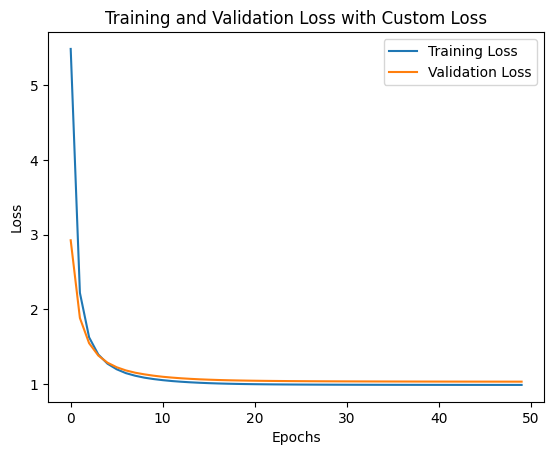

In [27]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Custom Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:

predictions = autoencoder.predict(X_train)

print("Sample Predictions (first 5 rows):")
print(predictions[:5])



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Sample Predictions (first 5 rows):
[[-2.13602994e-04  5.13946579e-04  4.49448387e-04  2.64968420e-03
  -3.16472258e-04  2.23801573e-04  2.00694823e-03  1.50353517e-04
  -4.67487320e-04 -2.33365502e-03 -1.69386691e-03 -2.00612284e-03
   2.16233265e-03 -1.58792536e-04 -3.62437044e-04 -6.86546555e-04
   1.68984628e-03 -4.41927084e-04  1.50082877e-03 -1.12251367e-03]
 [-2.13602994e-04  5.13946579e-04  4.49448387e-04  2.64968420e-03
  -3.16472258e-04  2.23801573e-04  2.00694823e-03  1.50353517e-04
  -4.67487320e-04 -2.33365502e-03 -1.69386691e-03 -2.00612284e-03
   2.16233265e-03 -1.58792536e-04 -3.62437044e-04 -6.86546555e-04
   1.68984628e-03 -4.41927084e-04  1.50082877e-03 -1.12251367e-03]
 [-1.45766797e-04  3.96231771e-04  3.40157421e-04  2.25411309e-03
  -2.86312221e-04  2.56213505e-04  1.67284266e-03  1.40339296e-04
  -5.49284276e-04 -2.02591880e-03 -1.55080319e-03 -1.76317676e-03
   1.90764852e-03  6.69337169e-06 -4.75744368e-04 -6.61589205e-0

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


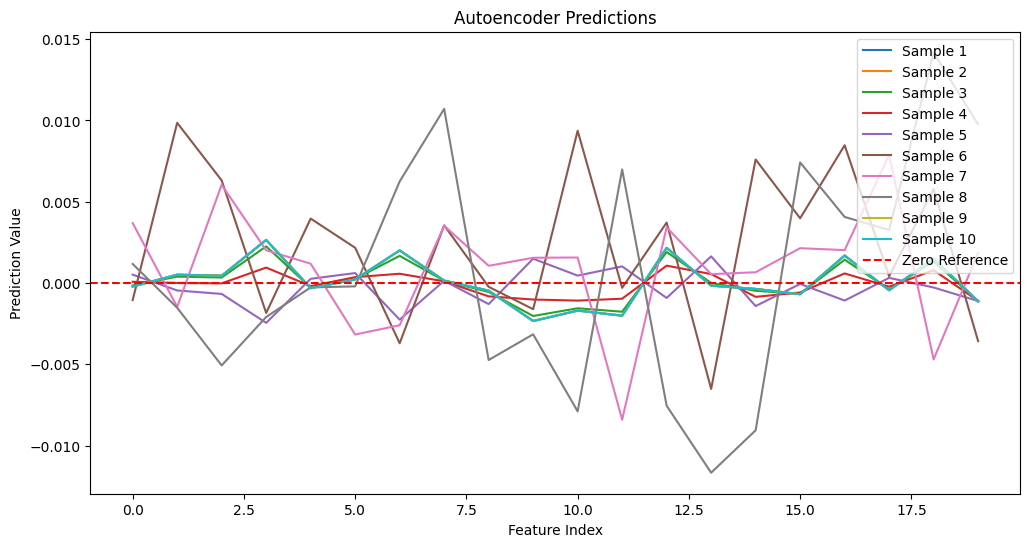

In [29]:

import matplotlib.pyplot as plt

predictions = autoencoder.predict(X_train)

plt.figure(figsize=(12, 6))

num_samples = 10  
num_features = X_train.shape[1]  

for i in range(num_samples):
    plt.plot(predictions[i], label=f'Sample {i+1}')

plt.title('Autoencoder Predictions')
plt.xlabel('Feature Index')
plt.ylabel('Prediction Value')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Reference')

plt.legend(loc='upper right')

plt.show()


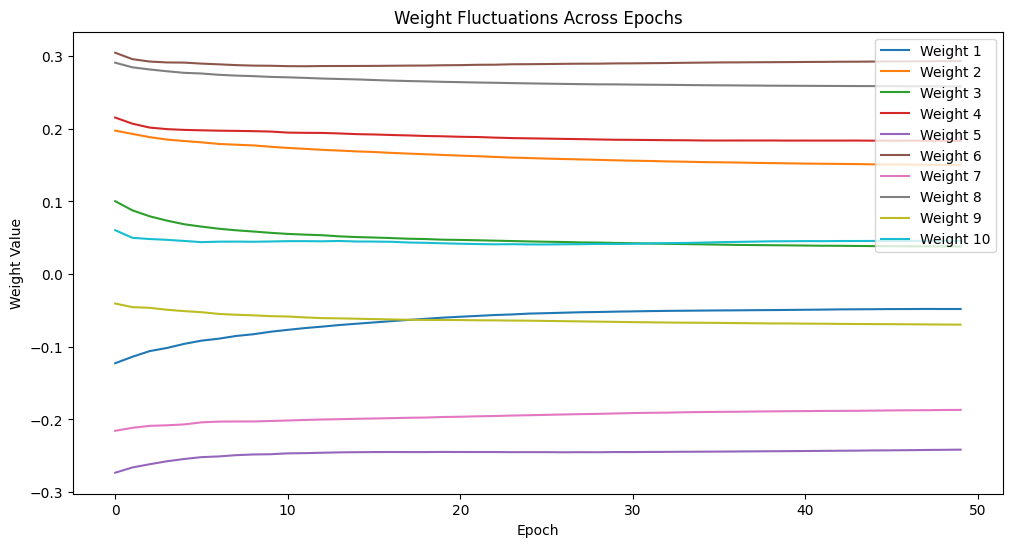

In [30]:

weights_history = np.array(weight_tracker.weights_history)

plt.figure(figsize=(12, 6))
for i in range(min(10, weights_history.shape[1])):  # Plot a few weight fluctuations
    plt.plot(weights_history[:, i], label=f'Weight {i+1}')

plt.title('Weight Fluctuations Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend(loc='upper right')
plt.show()
